# Section 3: Yelp Data Challenge - Clustering and PCA

Yiting Luo | Data Science Applied Research - 3

May 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('dataset/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g


## 1. Cluster the review text data for all the restaurants

### Define feature variables, here is the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

### Define target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [5]:
# Make a column and take the values, save to a variable named "target"
df['favorable'] = df['stars'] > 4
target = df['favorable'].values

In [6]:
target[:10]

array([ True, False,  True,  True,  True, False,  True,  True,  True,
       False])

#### look at the statistic of the target variable

In [7]:
# To be implemented
target.mean()

0.46397299477268145

### Create training dataset and test dataset

In [8]:
from sklearn.cross_validation import train_test_split

/Users/luoyiting/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# documents is X, target is y
# Now split the data to training set and test set
documents_train, documents_test, target_train, target_test = train_test_split(
    documents, target, test_size = 0.95, random_state = 42
)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [12]:
# Train the model with training data
vectors_train = vectorizer.fit_transform(documents_train).toarray() # toarray avoid sparse matrix

/Users/luoyiting/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [13]:
# Get the vocab of tfidf
words = vectorizer.get_feature_names()

In [14]:
# Use the trained model to transform all the reviews
vectors_documents = vectorizer.transform(documents).toarray()

/Users/luoyiting/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [16]:
assigned_cluster = kmeans.predict(vectors_documents)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [17]:
# cluster centers shape
print ("cluster centers:")
print (kmeans.cluster_centers_.shape)

n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

cluster centers:
(8, 1000)


In [18]:
top_centroids.shape

(8, 9)

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [19]:
print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ",".join(words[i] for i in centroid)))

top features for each cluster:
0: place,food,best,vegas,amazing,delicious,love,service,definitely
1: pizza,crust,good,place,great,slice,cheese,just,like
2: food,order,just,time,service,like,minutes,got,didn
3: chicken,fried,rice,good,food,ordered,place,sauce,like
4: great,food,service,place,amazing,awesome,friendly,staff,atmosphere
5: burger,fries,burgers,good,shake,cheese,place,great,food
6: good,food,really,place,service,nice,pretty,like,great
7: sushi,rolls,place,roll,ayce,good,great,service,eat


#### Try different k
If set k == to a different number, the top features will change?

In [20]:
# cluster to 6 clusters
kmeans = KMeans(n_clusters = 6)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
assigned_cluster = kmeans.predict(vectors_documents)

n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ",".join(words[i] for i in centroid)))

top features for each cluster:
0: place,food,best,vegas,amazing,love,delicious,service,good
1: food,order,just,time,service,like,minutes,place,got
2: pizza,good,crust,place,great,slice,cheese,just,like
3: great,food,service,place,good,amazing,friendly,awesome,staff
4: good,chicken,food,really,ordered,like,place,rice,sauce
5: burger,fries,burgers,good,shake,cheese,place,great,food


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [22]:
# random select sample from each cluster, then display samples with rating

for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents.shape[0])[assigned_cluster == i]
    sample_reviews = np.random.choice(cluster, 2, replace = False)
    print ("=" * 10)
    print ("Cluster %d:" % i)
    for review_index in sample_reviews:
        print("  %s -  " % df.iloc[review_index]['stars']),
        print("%s" % df.iloc[review_index]['text'])
    print

Cluster 0:
  5 -  
We were planning on coming for dinner but the plan got changed and we came here for lunch instead. I ordered the seafood pasta and it was so yummy!!!!!!! The flavor is perfect with all the seafood I love! The price is not too night for such a nice restaurant! I will definitely come back for there steak next time in Vegas!
  5 -  
Super fun. The food is amazing. Step outside your comfort zone and try Blackout. You won't be disappointed.
Cluster 1:
  4 -  
Been at this place couple times and every time still like the first time. Meat quality is perfect! even without marinated. You had my 5* but your server messed up!!!! 

Ordered a bottle of soju me both me and cousin, I.D. check! of course no complain on that. I'm 22 and my cousin is 28. The server looked at my I.D. and gave it back, then looked at my cousin's then surprisingly asked him " You're older than him( who is me )?!?!? ". Deep down in my heart, I died a little bit :( only a bottle of soju you dont have to ma

## 2. Cluster all the reviews of the most reviewed restaurant
Find the most reviewed restaurant and analyze its reviews

In [23]:
# Find the business who got most reviews, get filtered df, name it df_top_restaurant
most_reviewed_restaurant = df['business_id'].value_counts().index[0]

df_top_restaurant = df[df['business_id'] == most_reviewed_restaurant].copy().reset_index()

df_top_restaurant.head()

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,favorable
0,228947,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-02-25,0,pWnR3FNqTq1AoaZVj6cayw,3,"Date & Time: Tuesday, 2/24/15 @ 2pm\n\nThe buf...",0,RFIZhrka0gCpiL62M5E93g,False
1,228948,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2017-07-02,0,Xci8QJaDOB7OazJIP9U0Cw,5,I'm staying at Caesar's Palace for 4th of July...,0,J90_7u_8vPYa03GMohNxAA,True
2,228949,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-12-29,0,IZO6o6l-T8VKH-4eTzJNzw,3,Great buffet and beautiful food presentation. ...,0,KGGA28eimhhOgHmSfyhEgw,False
3,228950,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2016-03-19,0,KNYBYYO0Iq1QEsP4noql5g,4,"By far the best buffet in Vegas!! A must stop,...",2,gJGXoQ6UzqK-cWVO8MnGHA,False
4,228951,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0,2015-10-14,0,9SGHR-0E37W9rC56uJeFPA,5,Wholly schneikeis! This was simply the best ...,0,ej7th1TBk_WA_y4GU0n_iw,True


We can also load restaurant profile information from the business dataset

In [24]:
# Load business dataset 

import json
import pandas as pd

file_business = "dataset/business.json"
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [25]:
# Take a look at the most reviewed restaurant's profile 
df_business[df_business['business_id'] == most_reviewed_restaurant]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
119907,3570 S Las Vegas Blvd,"{'WheelchairAccessible': True, 'OutdoorSeating...",RESDUcs7fIiihp38-d6_6g,"[Sandwiches, Buffets, Restaurants, Breakfast &...",Las Vegas,"{'Monday': '7:30-22:00', 'Tuesday': '7:30-22:0...",1,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109,7009,4.0,NV


In [26]:
df_business[df_business['business_id'] == most_reviewed_restaurant]['categories'].values

array([list(['Sandwiches', 'Buffets', 'Restaurants', 'Breakfast & Brunch', 'Food'])],
      dtype=object)

In [27]:
df_business[df_business['business_id'] == most_reviewed_restaurant]['attributes'].values

array([{'WheelchairAccessible': True, 'OutdoorSeating': False, 'RestaurantsTakeOut': False, 'BusinessAcceptsCreditCards': True, 'RestaurantsGoodForGroups': True, 'Alcohol': 'full_bar', 'WiFi': 'no', 'RestaurantsDelivery': False, 'RestaurantsAttire': 'casual', 'HasTV': False, 'NoiseLevel': 'average', 'BusinessParking': {'valet': True, 'lot': False, 'validated': False, 'garage': True, 'street': False}, 'GoodForMeal': {'dessert': False, 'lunch': True, 'breakfast': False, 'dinner': True, 'brunch': True, 'latenight': False}, 'Caters': False, 'GoodForKids': True, 'RestaurantsReservations': False, 'RestaurantsPriceRange2': 3, 'Ambience': {'touristy': False, 'casual': True, 'trendy': False, 'romantic': False, 'intimate': False, 'classy': False, 'divey': False, 'upscale': False, 'hipster': False}, 'BikeParking': False, 'RestaurantsTableService': True}],
      dtype=object)

### Vectorize the text feature

In [28]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values
documents_top_restaurant

array(["Date & Time: Tuesday, 2/24/15 @ 2pm\n\nThe buffet was for two people at the price of $83 and some change. There is such variety when first stepping into the buffet. There are sections into seafood, american, mexican, italian, chinese/japanese, and dessert. They have charcuterie with a selection of cheeses as well as a salad section. They offer all you can drink beer and mimosas for $22 (each)\n\nThe buffet highlight for me was the fresh juices and dessert. The food was good, I rather settle for a buffet a boulder station for cheaper, than to go here again. The food here was a little bland and I didn't really enjoy most of it. They do have a tapas style going for some of the food selections so you can try most of the items they have to offer, but it was missing something -flavor. I decided to try this place out due to the numerous reviews on how great this place is, I would recommend it for you to try it at least once (the seafood was awesome). This place has amazing food presen

### Define target variable (for later classification use)

#### Again, look at perfect (5 stars) and imperfect (1-4 stars) rating

In [29]:
df_top_restaurant['favorable'] = (df_top_restaurant['stars'] > 4)
target_top_restaurant = df_top_restaurant['favorable'].values.astype(int)
target_top_restaurant

array([0, 1, 0, ..., 0, 0, 1])

#### Check the statistic of the target variable

In [30]:
target_top_restaurant.mean()

0.3855629465385563

In [31]:
documents_top_restaurant.shape, target_top_restaurant.shape

((4059,), (4059,))

### Create training dataset and test dataset

In [32]:
from sklearn.cross_validation import train_test_split

In [33]:
# documents_top_restaurant is X, target_top_restaurant is y
# Now split the data to training set and test set
# Now data is smaller
X_train, X_test, y_train, y_test = train_test_split(
    documents_top_restaurant, target_top_restaurant, test_size = 0.4, random_state = 42
)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2435,), (1624,), (2435,), (1624,))

### Get NLP representation of the documents

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [37]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(X_train).toarray() # toarray avoid sparse matrix

/Users/luoyiting/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [38]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [39]:
# Use the trained model to transform the test data
vectors_test = vectorizer.transform(X_test).toarray()

/Users/luoyiting/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [40]:
# Use the trained model to transform all the data
vectors_documents_top_restaurant = vectorizer.transform(documents_top_restaurant).toarray()

/Users/luoyiting/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [41]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [42]:
assigned_cluster = kmeans.predict(vectors_documents_top_restaurant)

#### Inspect the centroids

In [43]:
print ("cluster centroids:")
print (kmeans.cluster_centers_.shape)

cluster centroids:
(5, 1000)


#### Find the top 10 features for each cluster.

In [44]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ",".join(words[i] for i in centroid)))

top features for each cluster:
0: line,wait,time,food,long,buffet,hour,got,hours
1: crab,legs,buffet,king,good,food,prime,oysters,dinner
2: best,buffet,vegas,food,great,las,buffets,quality,worth
3: food,good,buffet,place,service,price,great,worth,quality
4: buffet,seafood,food,section,station,dessert,asian,good,like


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [45]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents_top_restaurant.shape[0])[assigned_cluster == i]
    sample_reviews = np.random.choice(cluster, 2, replace = False)
    print ("=" * 10)
    print ("Cluster %d:" % i)
    for review_index in sample_reviews:
        print("  %s -  " % df.iloc[review_index]['stars']),
        print("%s" % df.iloc[review_index]['text'])
    print

Cluster 0:
  4 -  
The decor is plain but that's not why you come here. You go to Delmonico for the great steaks, sides and yummy desserts. This place is almost always five stars for me but this last visit I made then mistake and deviated from my normal order of filet mignon and did the surf and turf special instead. The lobster was good (not sure if I would say amazing since it was slathered in bearnaise sauce) but the steak was only so-so; not up to normal Delmonico quality. Covering it in the amazing house steak sauce did help but I wouldn't recommend ordering the surf and turf.
  3 -  
Used my Vegas Rewards points and scored 2 Dinner MGM Grand Buffets it was great for the price $0...prime rib, crab, shrimp and all the fixins
Cluster 1:
  5 -  
Food. Was. Amazing. 
I tried the Chicken & Waffles with an Apple Compote. It was great! 
Bring your appetite!
  5 -  
Great Pho!! Had the classic beef pho (number 5), which did not disappoint with a rich flavorful broth. Would eat here again 

## 3. Use PCA to reduce dimensionality

### Stardardize features
X_train and X_test

standardize features by removing the mean and scaling to the unit varience, to make sure the importance of every feature is equal.

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(vectors_train)
X_test_scaled = scaler.transform(vectors_test)

### Use PCA to transform data (train and test) and get princial components

In [47]:
from sklearn.decomposition import PCA

n_col = 50
pca = PCA(n_components = n_col)


X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [48]:
X_train_pca.shape, X_test_pca.shape

((2435, 50), (1624, 50))

### See how much (and how much percentage of) variance the principal components explain

In [49]:
print (pca.explained_variance_[:10])

[8.42908241 6.55077303 4.37295566 4.12875352 3.77257293 3.50508557
 3.40842388 3.25832109 3.22979255 3.09370278]


In [50]:
print (pca.explained_variance_ratio_[:10])

[0.00842908 0.00655077 0.00437296 0.00412875 0.00377257 0.00350509
 0.00340842 0.00325832 0.00322979 0.0030937 ]


### Viz: plot proportion of variance explained with top principal components

For clear display, start with plotting <=20 principal components

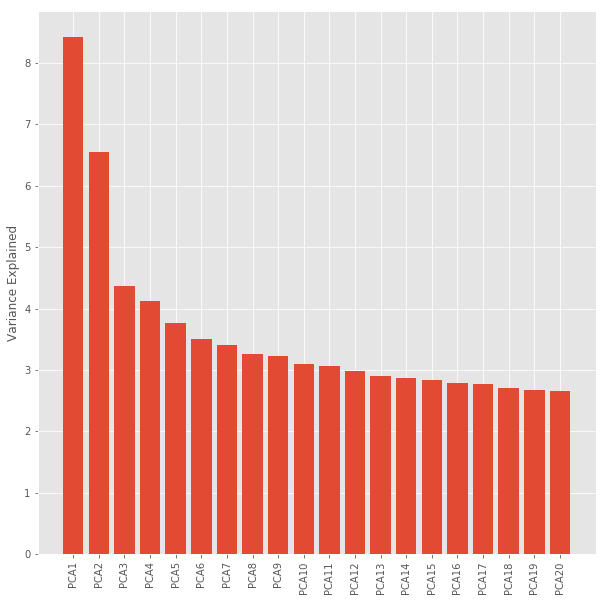

In [51]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ["PCA%s" % i for i in pca_range]

plt.figure(figsize = (10, 10))
plt.bar(pca_range,
       pca.explained_variance_[:n_col_to_display],
       align = 'center')
xticks = plt.xticks(pca_range,
                   pca_names,
                   rotation = 90)
plt.ylabel('Variance Explained')
plt.show()

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features (without PCA)

In [52]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()

model_lrc.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
# Get score for training set
model_lrc.score(X_train_scaled, y_train)

0.9971252566735113

In [54]:
# Get score for test set
model_lrc.score(X_test_scaled, y_test)

0.7112068965517241

#### Use (Stardardized + PCA) tf-idf vectors as features

In [55]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()

model_lrc.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
# Get score for training set
model_lrc.score(X_train_pca, y_train)

0.7860369609856263

In [57]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_lrc.score(X_test_pca, y_test)

0.7869458128078818

Thus, in this case, PCA helps us to avoid over-fitting. However, the interpretation of standarization + PCA is worse than standarization only.

#### Plot the coefficients against principal components


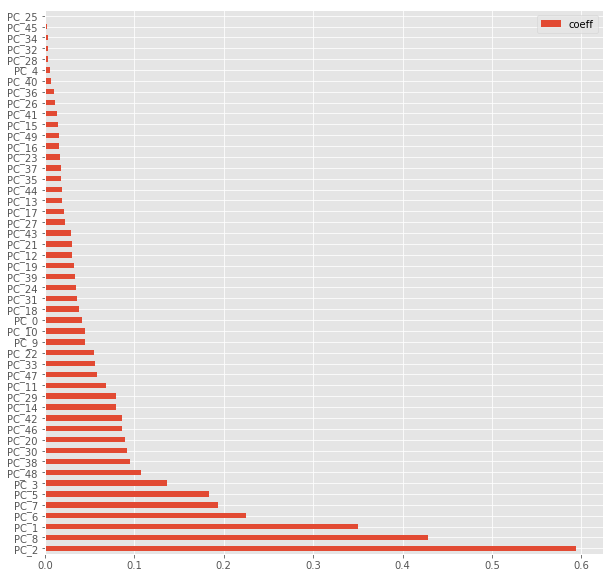

In [58]:
pca_range = np.arange(pca.n_components_)
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, abs(model_lrc.coef_.flatten())))).sort_values(by = [1], ascending = False)
df_coeffs.columns = ['PCs', 'coeff']

ax = df_coeffs.plot.barh(figsize = (10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [59]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier (max_depth = None,
                                    n_estimators = 40,
                                    min_samples_leaf = 3,
                                    random_state = 42)
model_rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [60]:
# Get score for training set
model_rfc.score(X_train_scaled, y_train)

0.9535934291581109

In [61]:
# Get score for test set
model_rfc.score(X_test_scaled, y_test)

0.7450738916256158

#### Use (Stardardized + PCA) tf-idf vectors as features

In [62]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth = None,
                                   n_estimators = 40,
                                   min_samples_leaf = 3,
                                   random_state = 42)
model_rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [63]:
# Get score for training set
model_rfc.score(X_train_pca, y_train)

0.988911704312115

In [64]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rfc.score(X_test_pca, y_test)

0.7469211822660099

Generally, random forest model is not easy to be over-fitted because this model decrease variance. In this case, the above result shows that random forest is over-fitted, we can guess it may because of large amount of noise in the data.

PCA doesn't have much effect here.

#### Plot the feature importances against principal components


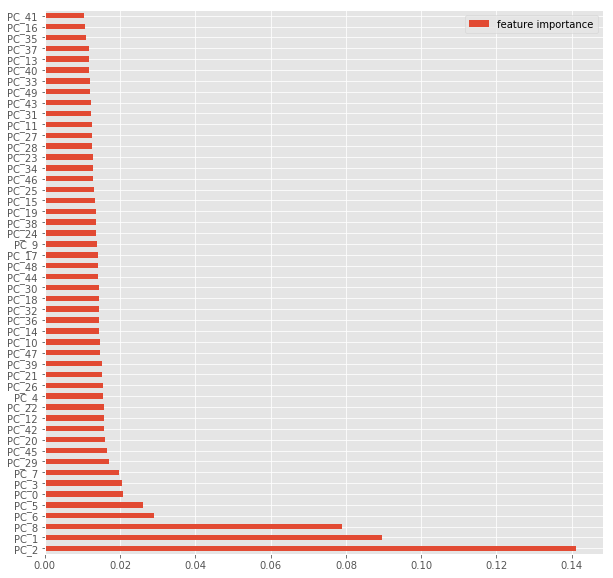

In [66]:
pca_range = np.arange(pca.n_components_)
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, model_rfc.feature_importances_))).sort_values(by = [1], ascending = False)
df_coeffs.columns = ['PCs', 'feature importance']

ax = df_coeffs.plot.barh(figsize = (10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()